# 7. K-Nearest Neighbors (K-NN) Algorithm

k-NN is a versatile and intuitive machine learning algorithm that operates based on the proximity of data points. It can be used for both classification and regression problems.

## Overview
1. How does K-NN work?
    * 1.1. How to choose the value of k?
    * 1.2. Types of distance metrics
    * 1.3. Why choose K-NN?
2. Assumptions
3. Common pitfalls
4. Evaluation Metrics
5. Implementation example
    * 5.1. K-NN for classification
    * 5.2. K-NN for regression
    * 5.3. Grid search for identifying the best k

## 1. How does it work?
K-NN is a lazy learning algorithm, meaning that it doesn't build an explicit model during training. Instead, it memorizes the training data, and when presented with a new data point for prediction, it identifies the k nearest neighbors in the training set based on a chosen distance metric (e.g., Euclidean distance). 

* **Classification tasks**: The majority class among the k neighbors determines the predicted class for the new point in classification tasks. 

* **Regression tasks**: The algorithm returns the average value of the target variable among the k neighbors.

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif" width="600px">

### 1.1. How to choose the value of k?
The choice of k is crucial in K-NN, as it can significantly impact the model's performance. A small value of k can lead to overfitting, while a large value can lead to underfitting.

* **Odd value of k**: It is recommended to choose an odd value of k to avoid ties in the majority voting for classification tasks.
* **Define a range of k values and use cross-validation**: To find the optimal value of k, you can define a range of k values and use cross-validation to evaluate the model's performance for each k. The k value that gives the best performance can be selected.
* **Grid Search**: Execute a grid search, testing n_neighbors across the defined range.

### 1.2. Types of distance metrics
* **Euclidean distance**: The most common distance metric used in K-NN. It calculates the distance between two points in a Euclidean space. It can be visualized as the length of the straight line that joins the two points in cartesian coordinates which are into consideration.

$$distance (x, Xi) = \sqrt{\sum_{j=1}^{n} (x_j - Xi_j)^2}$$

where $x$ is the new data point, $Xi$ is the training data point, and $n$ is the number of features or dimensionality of feature space.

* **Manhattan distance**: It calculates the distance between two points in a grid based on a strictly horizontal and/or vertical path. It is generally used when we are interested in the total distance traveled by the object instead of the displacement.

$$distance (x, Xi) = \sum_{j=1}^{n} |x_j - Xi_j|$$

* **Minkowski distance**: A generalization of Euclidean and Manhattan distances. From the formula bellow we can say that when p = 2 then it is the same as the formula for the Euclidean distance and when p = 1 then we obtain the formula for the Manhattan distance.

$$distance (x, Xi) = (\sum_{j=1}^{n} |x_j - Xi_j|^p)^{1/p}$$

where $p$ is a hyperparameter that defines the distance metric. When $p=1$, it is equivalent to the Manhattan distance, and when $p=2$, it is equivalent to the Euclidean distance.

### 1.3. Why choose K-NN?

* **Simple and intuitive**: K-NN is easy to understand and implement.
* **Non-parametric**: It doesn’t make any assumptions about the underlying data distribution.
* **Versatile**: It can be used for both classification and regression tasks. Can handle both **numerical and categorical data**.
* **No training phase**: K-NN doesn’t require a training phase, making it computationally efficient.
* **Interpretability**: It provides a clear interpretation of the results based on the nearest neighbors.
* **less sensitive to outliers compared to other algorithms.**
* **Does not require any assumptions about the underlying data distribution**. 

## 2. Assumptions

k-NN operates under the assumption that points in the same class or category tend to be close to each
other in feature space. This makes it well-suited for cases where the underlying decision boundaries
are complex and not easily separable by linear methods.

## 3. Common Pitfalls
- **Feature scaling:** k-NN is sensitive to the scale of features. Feature scaling (e.g. normalization) is often necessary to ensure that all features contribute equally to distance calculations.
- **Choice of k:** Choosing the right value of k is crucial for the algorithm's performance. A small k might lead to noisy decisions, while a large k could result in overly smooth decision boundaries.
- **Curse of dimensionality:** k-NN is sensitive to the number of dimensions in the dataset.In high-dimensional spaces, the “nearest“ neighbors might not be truly representative, leading to decreased accuracy and increased computation time.

### 4. Evaluation Metrics
- **Classification tasks**: Accuracy, Precision, Recall, F1-score, ROC-AUC.
- **Regression tasks**: Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared.


## 5. Implementation Examples

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

from sklearn.datasets import load_iris, load_diabetes

### 5.1. K-NN for classification

Accuracy: 0.94


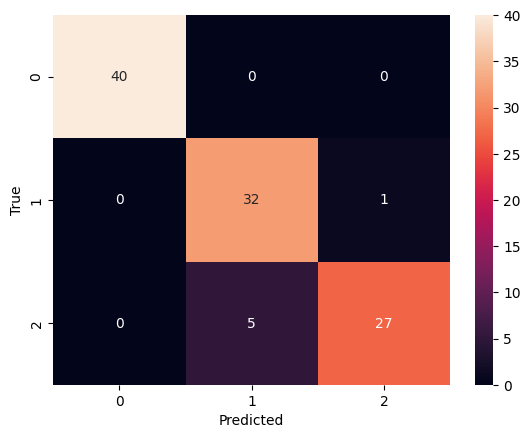

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier with k=3 and compute accuracy
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize results
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 5.2. K-NN for regression

In [3]:
# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Print dataset description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Mean Squared Error: 3047.449887640449
R-squared: 0.42480887066066253


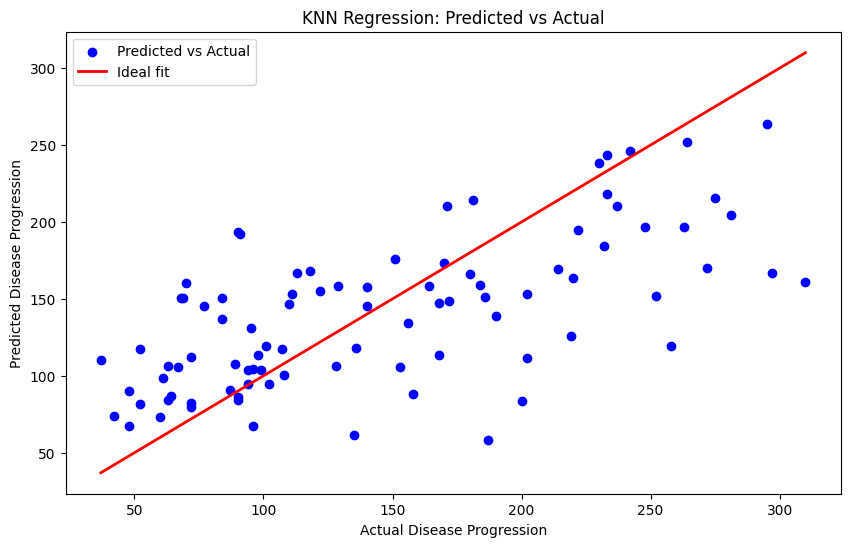

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal fit')
plt.title('KNN Regression: Predicted vs Actual')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.legend()
plt.show()

Since we have 10 features, it would be difficult to visualize the decision boundary in this case. 

However we can stil prot the results to evaluate them. The red line shows the area where target=prediction, 

### 5.3. Grid search for identifying the best k

In [6]:
param_grid = {'n_neighbors': range(1, 20)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation
knn_cv.fit(X_train, y_train)

print(f'Best k: {knn_cv.best_params_["n_neighbors"]}')
print(f'Best score: {knn_cv.best_score_}')

Best k: 18
Best score: 0.4049856186244888
